In [ ]:
# On Google colab
# Download data
!wget https://nadc.china-vo.org/res/file_upload/download?id=46376
!tar -xvf lamost

In [1]:
# Import dependencies
import numpy as np
from astropy.io import fits
import keras
import pandas as pd
import pylab as plt
import tensorflow as tf
from scipy import stats

from keras import backend, layers, models, utils
from keras.models import Model
from keras.models import load_model
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, Activation
from keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
type = ['Galaxy','QSO','Star']
for i in range(1,11):
  print('train_data_%02d'%i)
  hdu = fits.open('/content/drive/MyDrive/output/train_data_%02d.fits'%i)
  label = hdu[1].data['label']
  for j in [0,1,2]:
    print(type[j],'\t:%d'%len(label[label==j]))

train_data_01
Galaxy 	:3427
QSO 	:1011
Star 	:5562
train_data_02
Galaxy 	:0
QSO 	:0
Star 	:10000
train_data_03
Galaxy 	:0
QSO 	:0
Star 	:10000
train_data_04
Galaxy 	:0
QSO 	:0
Star 	:10000
train_data_05
Galaxy 	:0
QSO 	:0
Star 	:10000
train_data_06
Galaxy 	:0
QSO 	:0
Star 	:10000
train_data_07
Galaxy 	:0
QSO 	:0
Star 	:10000
train_data_08
Galaxy 	:0
QSO 	:0
Star 	:10000
train_data_09
Galaxy 	:0
QSO 	:0
Star 	:10000
train_data_10
Galaxy 	:0
QSO 	:0
Star 	:10000


In [3]:
# Load train_data_01.fits
hdulist = fits.open('/content/drive/MyDrive/output/train_data_01.fits')
x_1 = hdulist[0].data
y_1 = hdulist[1].data['label']

In [4]:
#Convert labels to categorical 3 classes
y_1 = utils.to_categorical(y_1, 3)

In [5]:
# Convert type and split data into training and testing set
x_1 = x_1.astype(np.float32)
y_1 = y_1.astype(np.float32)
train_idx, test_idx = train_test_split(np.arange(x_1.shape[0]), test_size=0.3)
train_x_1, train_y_1, test_x_1, test_y_1 = x_1[train_idx], y_1[train_idx], x_1[test_idx], y_1[test_idx]

In [6]:
# Define neural network
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape=(3000,1), padding='same'))
model.add(Conv1D(64, 2, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 2, activation='relu', padding='same'))
model.add(Conv1D(128, 2, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
# Train the neural network
model.fit(train_x_1, train_y_1,  batch_size=5, epochs=10, validation_data=(test_x_1, test_y_1),verbose=1)

Epoch 1/10
1400/1400 [==============================] - 14s 6ms/step - loss: 2.7683 - accuracy: 0.8054 - val_loss: 0.4540 - val_accuracy: 0.8253
Epoch 2/10
1400/1400 [==============================] - 7s 5ms/step - loss: 0.5504 - accuracy: 0.8414 - val_loss: 0.5262 - val_accuracy: 0.7843
Epoch 3/10
1400/1400 [==============================] - 7s 5ms/step - loss: 0.6282 - accuracy: 0.7353 - val_loss: 0.4354 - val_accuracy: 0.8133
Epoch 4/10
1400/1400 [==============================] - 7s 5ms/step - loss: 0.5320 - accuracy: 0.7879 - val_loss: 0.4460 - val_accuracy: 0.8523
Epoch 5/10
1400/1400 [==============================] - 7s 5ms/step - loss: 0.4388 - accuracy: 0.8389 - val_loss: 0.4179 - val_accuracy: 0.8420
Epoch 6/10
1400/1400 [==============================] - 7s 5ms/step - loss: 0.4001 - accuracy: 0.8560 - val_loss: 0.2156 - val_accuracy: 0.9433
Epoch 7/10
1400/1400 [==============================] - 7s 5ms/step - loss: 0.4089 - accuracy: 0.8650 - val_loss: 0.4084 - val_accuracy

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3000, 64)          192       
                                                                 
 conv1d_1 (Conv1D)           (None, 3000, 64)          8256      
                                                                 
 max_pooling1d (MaxPooling1  (None, 1500, 64)          0         
 D)                                                              
                                                                 
 conv1d_2 (Conv1D)           (None, 1500, 128)         16512     
                                                                 
 conv1d_3 (Conv1D)           (None, 1500, 128)         32896     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 750, 128)          0         
 g1D)                                                   

In [9]:
#Define confusion matrix
def confusion(confusion_mat):

    conf_arr = confusion_mat.astype(int)

    norm_conf = []
    a = np.max(conf_arr)
    for i in conf_arr:
        tmp_arr = []
        for j in i:
            tmp_arr.append(float(j) / float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure(figsize=(10, 10.5))
    ax = fig.gca()
    ax.set_title("Confusion Matrix", fontsize=20)
    ax.set_aspect(1)
    ax.imshow(np.array(norm_conf), cmap=plt.get_cmap("Blues"), interpolation="nearest")

    width, height = conf_arr.shape

    for x in range(width):
        for y in range(height):
            ax.annotate(
                str(conf_arr[x][y]),
                xy=(y, x),
                horizontalalignment="center",
                verticalalignment="center",
            )

    ax.set_xticks(np.arange(width))
    ax.set_xticklabels([str(i) for i in range(width)], fontsize=20)
    ax.set_yticks(np.arange(height))
    ax.set_yticklabels([str(i) for i in range(width)], fontsize=20)
    ax.set_ylabel("Prediction", fontsize=20)
    ax.set_xlabel("Truth", fontsize=20)
    fig.tight_layout()

    return None

In [10]:
# Test the neural net
test_labels_1 = model.predict(test_x_1)

94/94 [==============================] - 1s 3ms/step


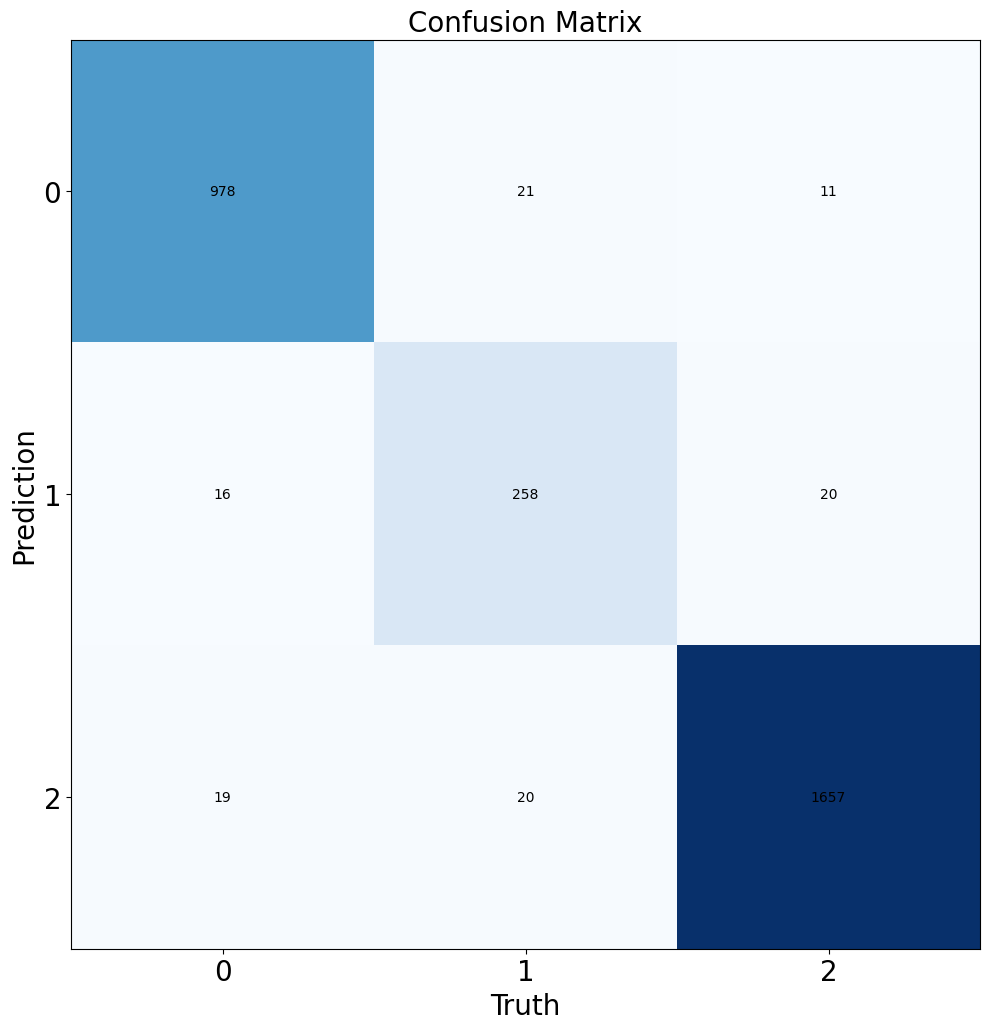

In [11]:
# Convert predicted_labels to class and plot the confusion matrix
test_class = np.argmax(test_labels_1, axis=1)
test_y_1_class = np.argmax(test_y_1, axis=1)
confusion_matrix = np.zeros((3,3))
for counter, i in enumerate(test_class):
    confusion_matrix[i, test_y_1_class[counter]] += 1
confusion(confusion_matrix)

In [12]:
label_train_1 = model.predict(train_x_1)
max_label_train_1 = np.rint(label_train_1)
print(classification_report(train_y_1, max_label_train_1))

219/219 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2414
           1       0.93      0.76      0.84       712
           2       0.99      0.98      0.98      3874

   micro avg       0.98      0.95      0.97      7000
   macro avg       0.97      0.90      0.93      7000
weighted avg       0.98      0.95      0.97      7000
 samples avg       0.95      0.95      0.95      7000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
max_label_test_1 = np.rint(test_labels_1)
print(classification_report(test_y_1, max_label_test_1))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1013
           1       0.92      0.75      0.83       299
           2       0.98      0.98      0.98      1688

   micro avg       0.98      0.95      0.96      3000
   macro avg       0.96      0.90      0.93      3000
weighted avg       0.97      0.95      0.96      3000
 samples avg       0.95      0.95      0.95      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Load test data and convert type
hdu = fits.open('/content/drive/MyDrive/output/test_data.fits')
x_pred = hdu[0].data
x_pred = x_pred.astype(np.float32)

In [15]:
# Predict test data
predicted_labels_1 = model.predict(x_pred)

32/32 [==============================] - 0s 6ms/step


In [16]:
# Convert predicted_labels to class
prediction_class_1 = np.argmax(predicted_labels_1, axis=1)

In [17]:
# Write CSV file
objid = hdu[1].data['objid'].reshape(1000,1)
prediction_class_1 = prediction_class_1.reshape(1000,1)
output = np.append(objid,prediction_class_1,axis=1)
np.savetxt(r'predict_model_01.csv',output,header='#objid,label')

In [36]:
#Load all train data
x = x_1
y = np.argmax(y_1, axis=1)
for i in range(2,11):
  hdulist = fits.open('/content/drive/MyDrive/output/train_data_%02d.fits'%i)
  x = np.append(x,hdulist[0].data,axis=0)
  y = np.append(y,hdulist[1].data['label'],axis=0)

In [37]:
#Convert labels to categorical 3 classes and split data into training and testing set
y = utils.to_categorical(y, 3)
x = x.astype(np.float32)
y = y.astype(np.float32)
train_idx, test_idx = train_test_split(np.arange(x.shape[0]), test_size=0.3)
train_x, train_y, test_x, test_y = x[train_idx], y[train_idx], x[test_idx], y[test_idx]

In [38]:
# Train the new neural network
model.fit(train_x, train_y,  batch_size=20, epochs=10, validation_data=(test_x, test_y),verbose=1)

Epoch 1/10
3500/3500 [==============================] - 24s 7ms/step - loss: 0.0548 - accuracy: 0.9858 - val_loss: 0.0259 - val_accuracy: 0.9892
Epoch 2/10
3500/3500 [==============================] - 24s 7ms/step - loss: 0.0378 - accuracy: 0.9879 - val_loss: 0.0192 - val_accuracy: 0.9931
Epoch 3/10
3500/3500 [==============================] - 24s 7ms/step - loss: 0.0487 - accuracy: 0.9860 - val_loss: 0.0203 - val_accuracy: 0.9940
Epoch 4/10
3500/3500 [==============================] - 24s 7ms/step - loss: 0.0388 - accuracy: 0.9880 - val_loss: 0.0166 - val_accuracy: 0.9944
Epoch 5/10
3500/3500 [==============================] - 24s 7ms/step - loss: 0.0378 - accuracy: 0.9886 - val_loss: 0.0268 - val_accuracy: 0.9932
Epoch 6/10
3500/3500 [==============================] - 24s 7ms/step - loss: 0.0467 - accuracy: 0.9874 - val_loss: 0.0281 - val_accuracy: 0.9927
Epoch 7/10
3500/3500 [==============================] - 24s 7ms/step - loss: 0.1204 - accuracy: 0.9887 - val_loss: 0.0193 - val_ac

In [39]:
# Test the new neural net
test_labels = model.predict(test_x)

938/938 [==============================] - 2s 2ms/step


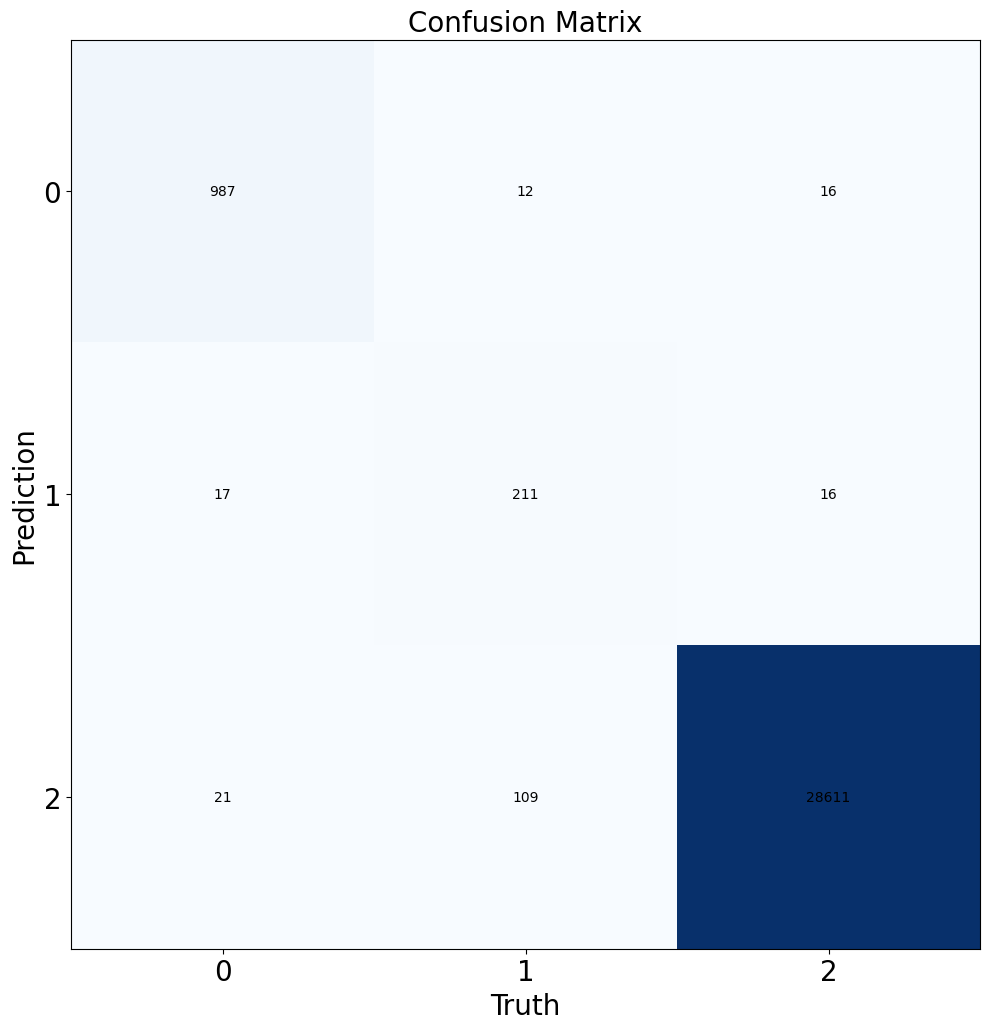

In [40]:
# Convert predicted_labels to class and plot the confusion matrix
test_class = np.argmax(test_labels, axis=1)
test_y_class = np.argmax(test_y, axis=1)
confusion_matrix = np.zeros((3,3))
for counter, i in enumerate(test_class):
    confusion_matrix[i, test_y_class[counter]] += 1
confusion(confusion_matrix)

In [41]:
label_train = model.predict(train_x)
max_label_train = np.rint(label_train)
print(classification_report(train_y, max_label_train))

2188/2188 [==============================] - 4s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2402
           1       0.95      0.56      0.70       679
           2       1.00      1.00      1.00     66919

   micro avg       1.00      0.99      0.99     70000
   macro avg       0.98      0.84      0.89     70000
weighted avg       1.00      0.99      0.99     70000
 samples avg       0.99      0.99      0.99     70000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
max_label_test = np.rint(test_labels)
print(classification_report(test_y, max_label_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1025
           1       0.89      0.51      0.65       332
           2       1.00      1.00      1.00     28643

   micro avg       1.00      0.99      0.99     30000
   macro avg       0.96      0.82      0.87     30000
weighted avg       0.99      0.99      0.99     30000
 samples avg       0.99      0.99      0.99     30000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# Predict test data with new model
predicted_labels= model.predict(x_pred)

32/32 [==============================] - 0s 2ms/step


In [46]:
# Convert predicted_labels to class
prediction_class = np.argmax(predicted_labels, axis=1)

In [47]:
# Write CSV file
objid = hdu[1].data['objid'].reshape(1000,1)
prediction_class = prediction_class.reshape(1000,1)
output = np.append(objid,prediction_class,axis=1)
np.savetxt(r'predict_model.csv',output,header='#objid,label')